In [24]:
import cfdnetplus
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [39]:
fields= ['U','p','k','omega', 'nut']
mainfolder='airfoil2d/airFoil_1500_ssim'

xlim =[-50,50]
ylim = [-30 , 30]
xres=256
yres=66
zcut=0.05

In [40]:
cfdnetplus.extractInput2d(mainfolder,fields, xlim, ylim,xres,yres,zcut)

airfoil2d/airFoil_1500_ssim
airFoil_1500_ssim_0
airFoil_1500_ssim_20
write airfoil2d/airFoil_1500_ssim/input.npy


In [41]:
data=np.load(mainfolder+'/input.npy')

In [42]:
cfdnetplus.pred(mainfolder,data,'foil')

1/1 [==============================] - 0s 121ms/step
succesful prediction stored at airfoil2d/airFoil_1500_ssim/pred.npy


In [45]:
modelfolder='cfdnetplus_models/model_ssim'
model = tf.keras.models.load_model(modelfolder,compile=False)
normal=np.load(modelfolder+'/normal.npy')  

In [46]:
prediction=model.predict(data*1/normal)
prediction=prediction*normal  
np.save(mainfolder+'/pred',prediction)

1/1 [==============================] - 0s 107ms/step


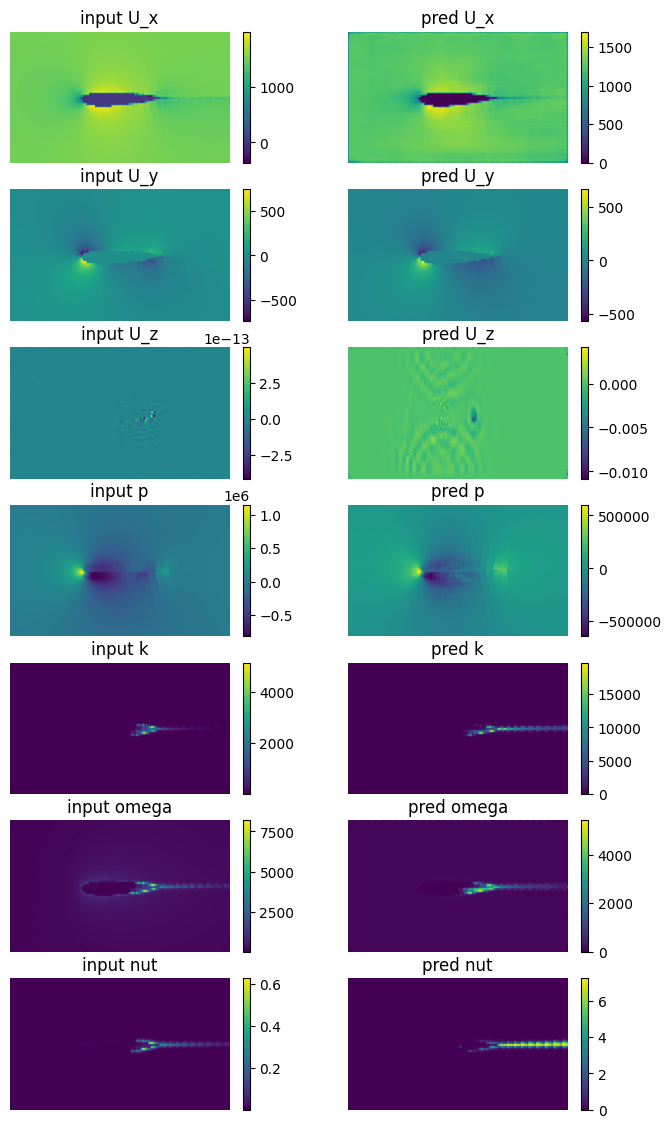

In [47]:
pred=np.load(mainfolder+'/pred.npy')
n=0
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=data.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(data[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(pred[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('pred '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

In [48]:
cfdnetplus.pred2OF2D(mainfolder,fields,xlim,ylim)

airFoil_1500_ssim_0
airFoil_1500_ssim_20
folder airfoil2d/airFoil_1500_ssim/21 was created
write airfoil2d/airFoil_1500_ssim/21/U
write airfoil2d/airFoil_1500_ssim/21/p
write airfoil2d/airFoil_1500_ssim/21/k
write airfoil2d/airFoil_1500_ssim/21/omega
write airfoil2d/airFoil_1500_ssim/21/nut
